## Customer Personality Analysis
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


###### Attributes

People
●	ID: Customer's unique identifier
●	Year_Birth: Customer's birth year 
●	Education: Customer's education level
●	Marital_Status: Customer's marital status
●	Income: Customer's yearly household income
●	Kidhome: Number of children in customer's household
●	Teenhome: Number of teenagers in customer's household
●	Dt_Customer: Date of customer's enrollment with the company
●	Recency: Number of days since customer's last purchase
●	Complain: 1 if the customer complained in the last 2 years, 0
     otherwise
     
Products
●	MntWines: Amount spent on wine in last 2 years 
●	MntFruits : Amount spent on fruits in last 2 years
●	MntMeatProducts : Amount spent on meat in last 2 years
●	MntFishProducts : Amount spent on fish in last 2 years
●	MntSweetProducts : Amount spent on sweets in last 2 years
●	MntGoldProds: Amount spent on gold in last 2 years

Promotion
●	NumDealsPurchases: Number of purchases made with a discount
●	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
●	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
●	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
●	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
●	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
●	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
●	NumWebPurchases: Number of purchases made through the company’s website
●	NumCatalogPurchases: Number of purchases made using a catalogue
●	NumStorePurchases: Number of purchases made directly in stores
●	NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
Customer = pd.read_excel("D:/DATA Science/project data science/marketing_campaign1.xlsx")
Customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df = Customer.copy()

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_6004\1386844009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


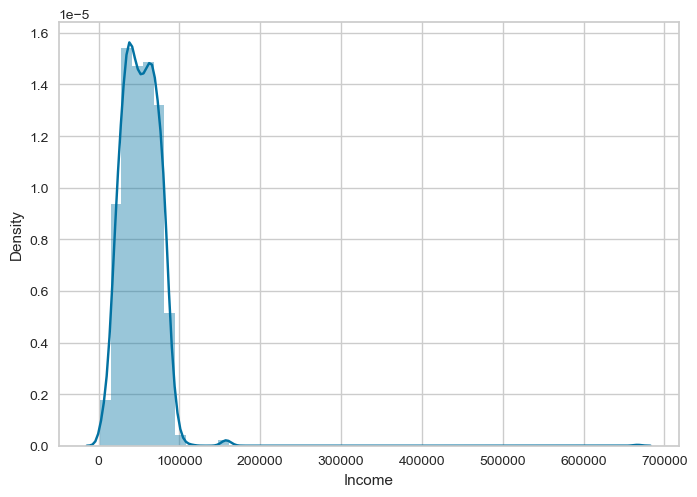

In [8]:
sns.distplot(df['Income'])
plt.show()

In [9]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
df['Income']=df['Income'].fillna(df['Income'].median())

In [10]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

#### Univariate Analysis :

In [12]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


In [13]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [14]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

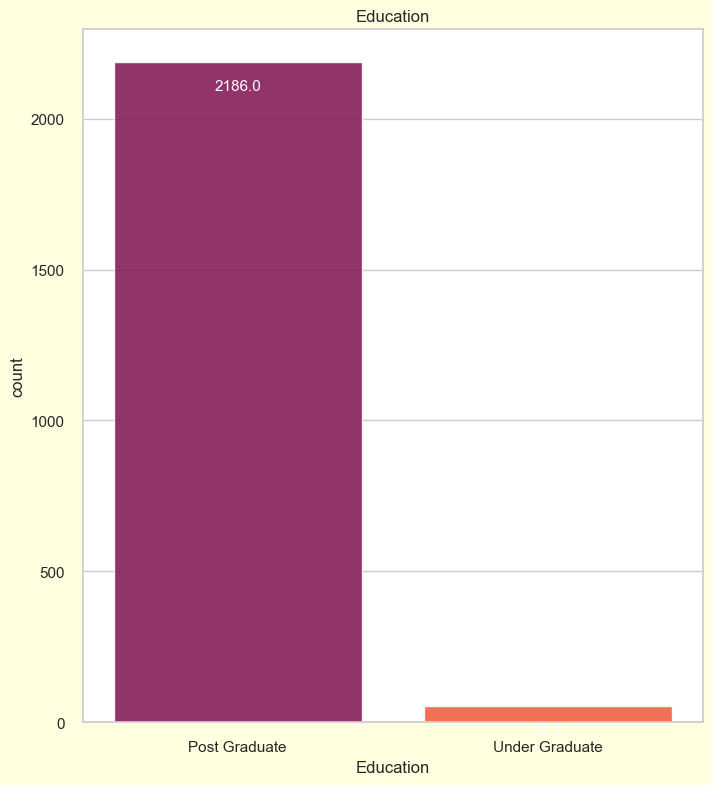

In [15]:
plt.figure(figsize=(8,9),facecolor = 'lightyellow')

sns.set(style='whitegrid')

ax= sns.countplot( x=df["Education"], saturation=1,alpha=0.9,palette='rocket',order = df['Education'].value_counts().index)
ax.set_title('Education')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4, p.get_height()),ha='center', va ='top', color='white',size=11)
    
plt.show()


We observed that most of the data points here are post-Graduated

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

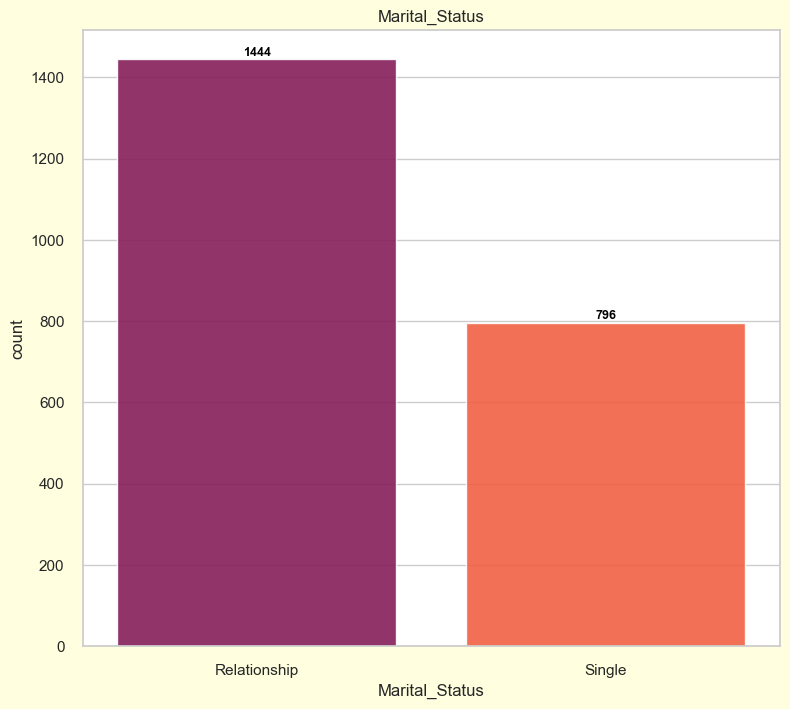

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (9,8),facecolor = 'lightyellow')
sns.set(style = 'whitegrid')

ax=sns.countplot(data=df, x='Marital_Status', saturation = 1, alpha = 0.9, palette = 'rocket',order = df['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')

for p in ax.patches:
    number='{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)
    

64.46% of Customers in the dataset are in "Relationship". 35.53% of Customers in the dataset are "Single".

In [19]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Income')

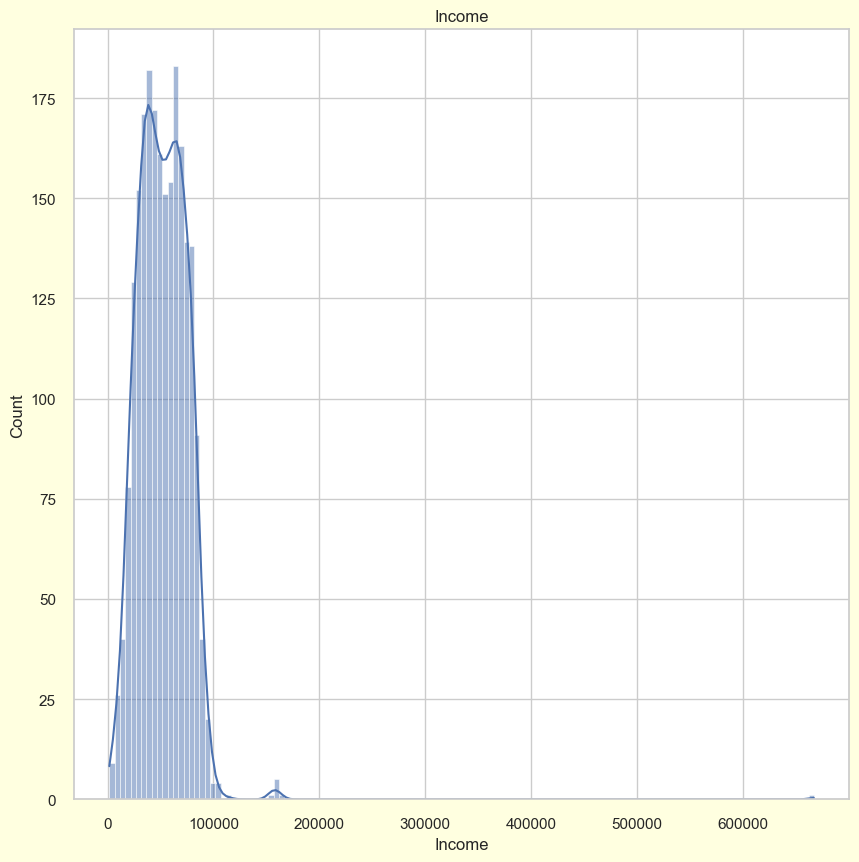

In [20]:
plt.figure(figsize=(10,10), facecolor='lightyellow')

sns.set(style='whitegrid')

ax = sns.histplot(data= Customer, x='Income', binwidth=5000, kde=True)

ax.set_title('Income')


The income column is left skewed as we saw earrlier but it has some outliers that we will treat it in later stage while model building

In [21]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [23]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']

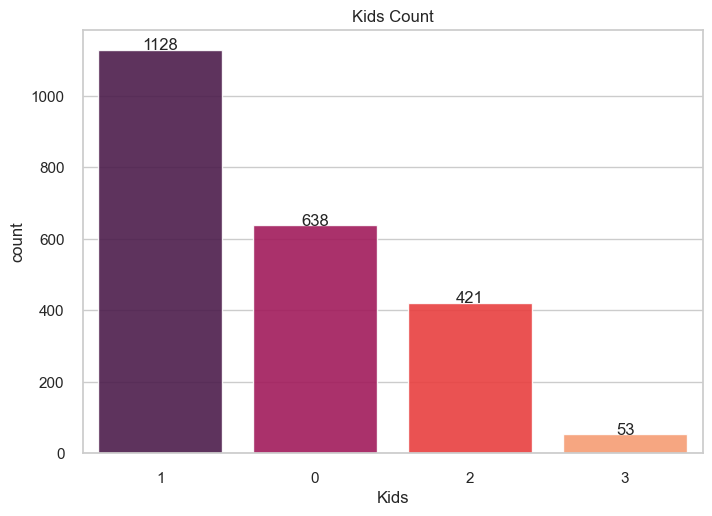

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Create the countplot
ax = sns.countplot(data=df, x='Kids', saturation=1, alpha=0.9, palette='rocket', order=df['Kids'].value_counts().index)

# Set the title
ax.set_title('Kids Count')

# Add labels to the bars
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(number, (x, y), ha='center')
    
# Show the plot
plt.show()
    

50.35% of Customers in the dataset have 1 kid. 28.48% of Customers in the dataset have no kids. 18.79% of Customers in the dataset have 2 kids. 2.36% of Customers in the dataset have 3 kids.

In [25]:
df[['MntFruits','MntMeatProducts']].head()

,MntFruits,MntMeatProducts
0,88,546
1,1,6
2,49,127
3,4,20
4,43,118


In [26]:
df['MntFishProducts'].nunique()

182

In [27]:
df['MntFruits'].nunique()

158

In [28]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [29]:
df['Expenses'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_6004\1928180415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Expenses"],color = 'blue')


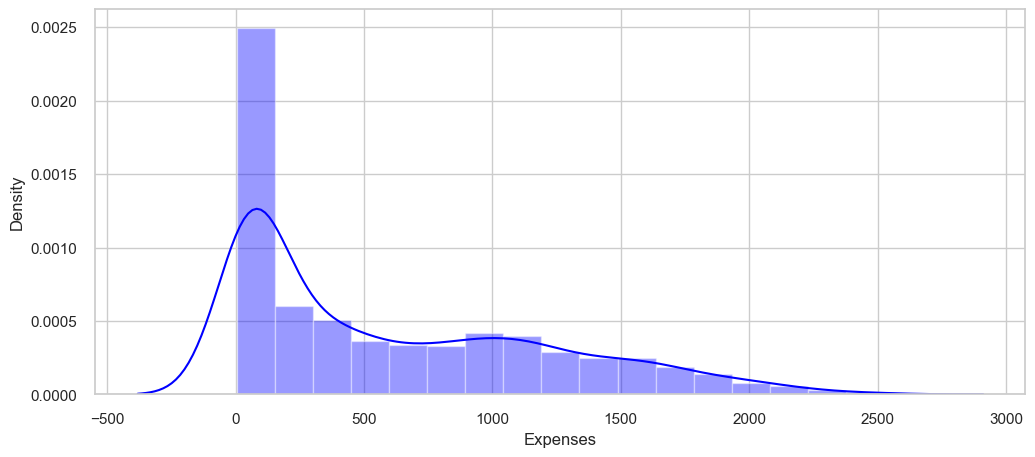

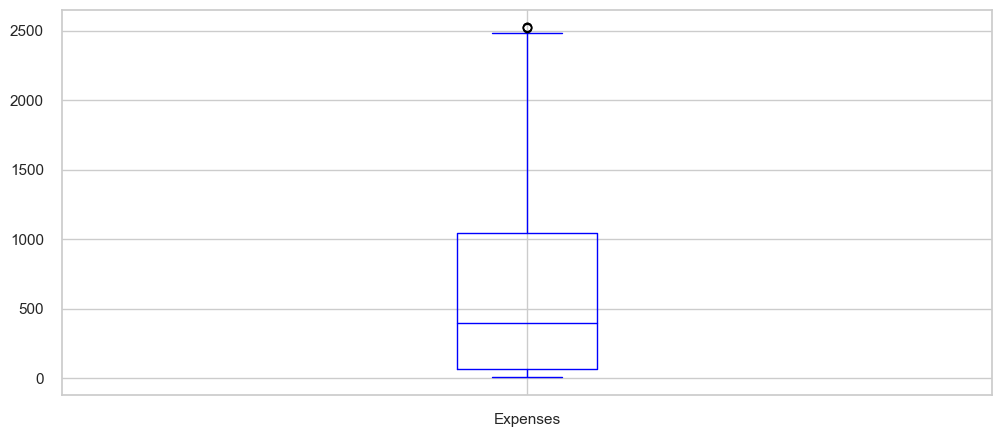

In [30]:
plt.figure(figsize=(12,5))
sns.distplot(df["Expenses"],color = 'blue')
plt.show()
df["Expenses"].plot.box(figsize=(12,5),color='blue')
plt.show()

The distribution of expenses is uniform

In [31]:
df['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [32]:
df['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [33]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




Text(0.5, 1.0, 'Frequency Of Each Category in the TotalAcceptedCmp Variable \n')

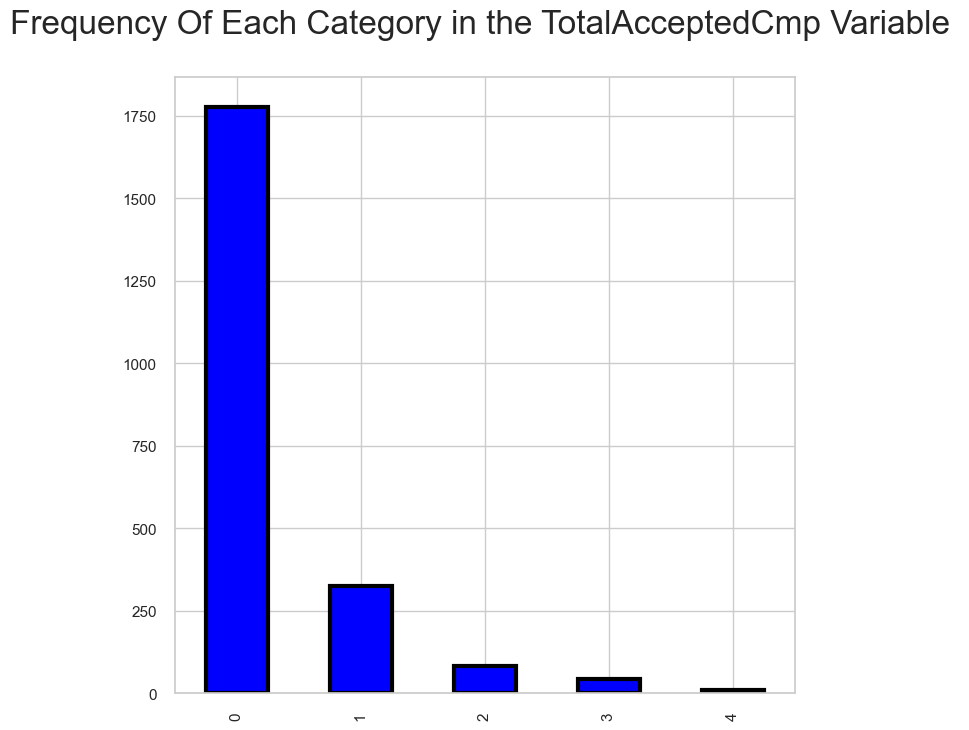

In [34]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

#VISUALIZING THE "TotalAcceptedCmp"


plt.figure(figsize=(8,8))
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'blue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)

79.33% of Customers accepted the offer in the campaign are "0". 14.50% of Customers accepted the offer in the campaign are "1". 3.70% of Customers accepted the offer in the campaign are "2". 1.96% of Customers accepted the offer in the campaign are "3". 0.49% of Customers accepted the offer in the campaign are "4".

In [35]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [36]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [37]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [38]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [39]:
df[['NumTotalPurchases']]

,NumTotalPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [40]:
df['NumTotalPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

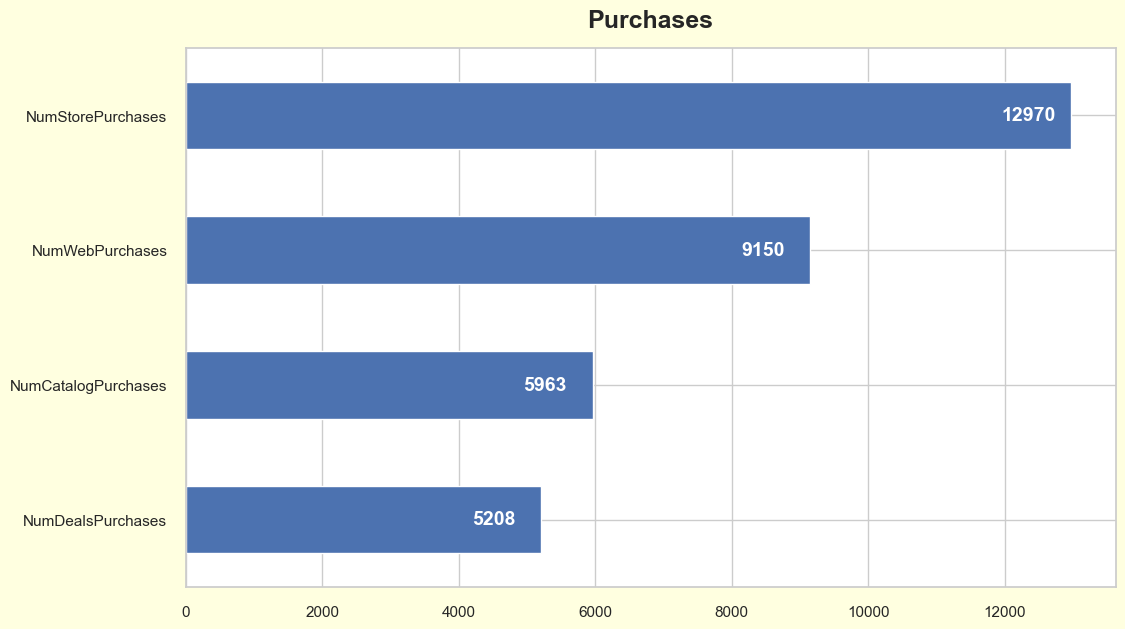

In [41]:
plt.figure(figsize=(12,7), facecolor='lightyellow')

ax = Customer[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

In [42]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,2,27,0,6
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,1,53,0,8
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,1,422,0,19


In [43]:
#ADDING A COLUMN "customer_Age" IN THE DATAFRAME....
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,0,1617,0,25,67
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2,27,0,6,70
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,0,21,59
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,1,53,0,8,40
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,1,422,0,19,43


In [44]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [45]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,67
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,70
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,59
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,40
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,43


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2240 non-null   object        
 1   Marital_Status     2240 non-null   object        
 2   Income             2240 non-null   float64       
 3   Dt_Customer        2240 non-null   datetime64[ns]
 4   Recency            2240 non-null   int64         
 5   Complain           2240 non-null   int64         
 6   Response           2240 non-null   int64         
 7   Kids               2240 non-null   int64         
 8   Expenses           2240 non-null   int64         
 9   TotalAcceptedCmp   2240 non-null   int64         
 10  NumTotalPurchases  2240 non-null   int64         
 11  Customer_Age       2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 210.1+ KB


In [47]:
# Get the maximum date (newest customer registration date)
newest_customer_date = df['Dt_Customer'].max()

# Calculate the duration since the last purchase or since the customer became a member
customer_for_days = []
for registration_date in df['Dt_Customer']:
    delta = newest_customer_date - registration_date
    customer_for_days.append(delta.days)

# Add the 'Customer_For' feature to the dataframe
df['Customer_For'] = customer_for_days

In [48]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,2012-09-04,58,0,1,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2014-03-08,38,0,0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,2014-02-10,26,0,0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,0,19,43,161


In [49]:
df['Customer_For'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [50]:
df.drop(['Dt_Customer','Recency','Complain','Response'],axis=1,inplace=True)

In [51]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,Post Graduate,Single,58138.0,0,1617,0,25,67,663
1,Post Graduate,Single,46344.0,2,27,0,6,70,113
2,Post Graduate,Relationship,71613.0,0,776,0,21,59,312
3,Post Graduate,Relationship,26646.0,1,53,0,8,40,139
4,Post Graduate,Relationship,58293.0,1,422,0,19,43,161


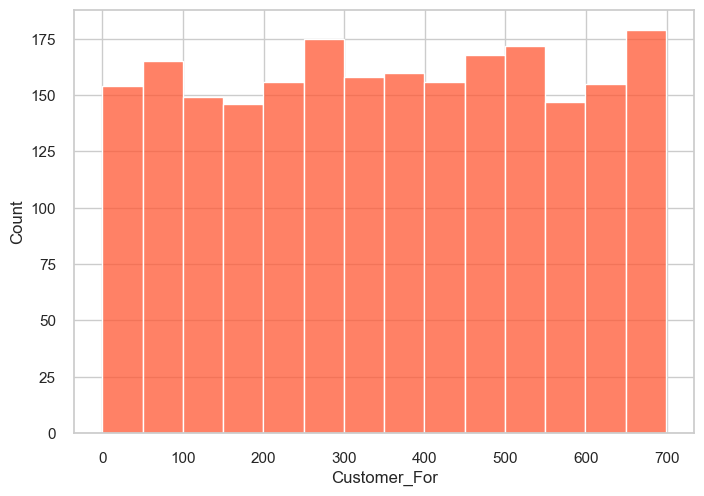

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Customer_For"], color='#FF5733')
plt.show()

Most of the customers are regular to the campaign for 0- 700 days

###### Bivariate Analysis

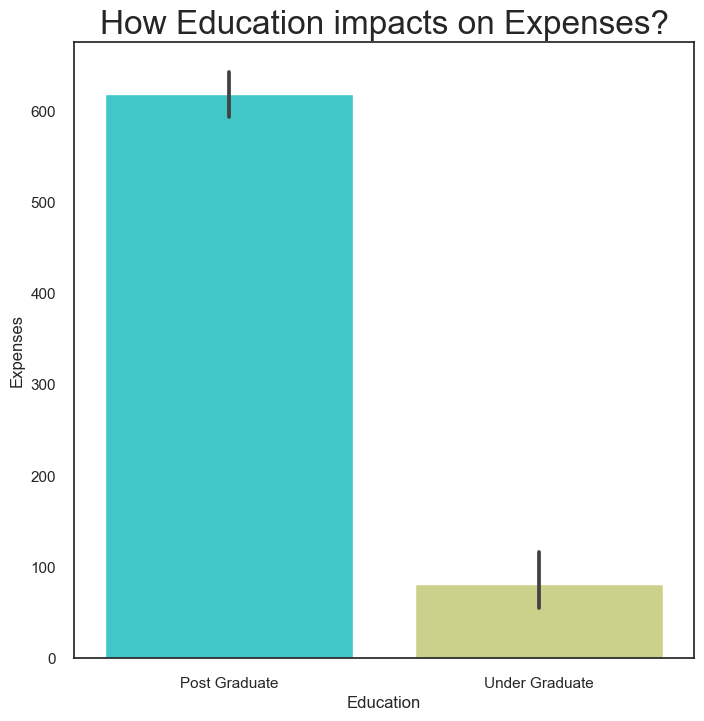

In [53]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Education impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

We observe that the post graduated people spends more than the UG people

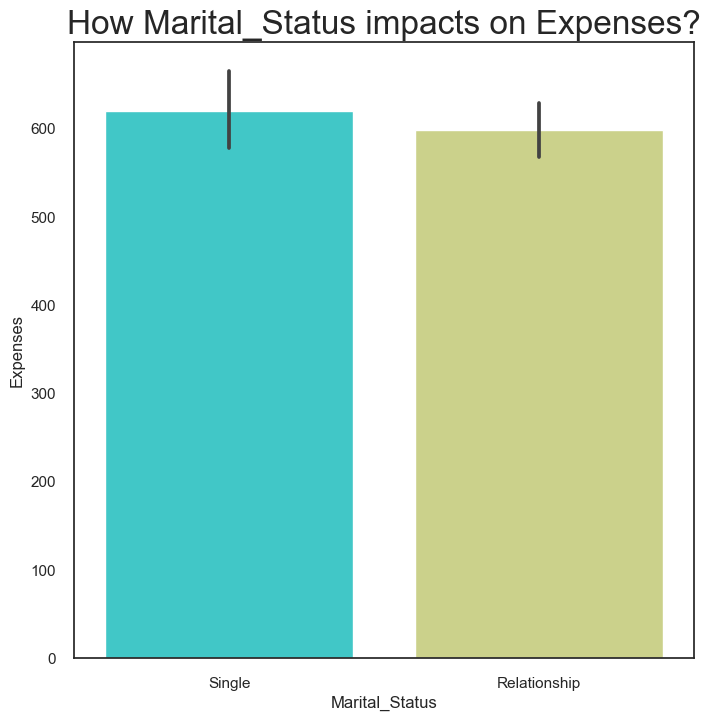

In [54]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow")

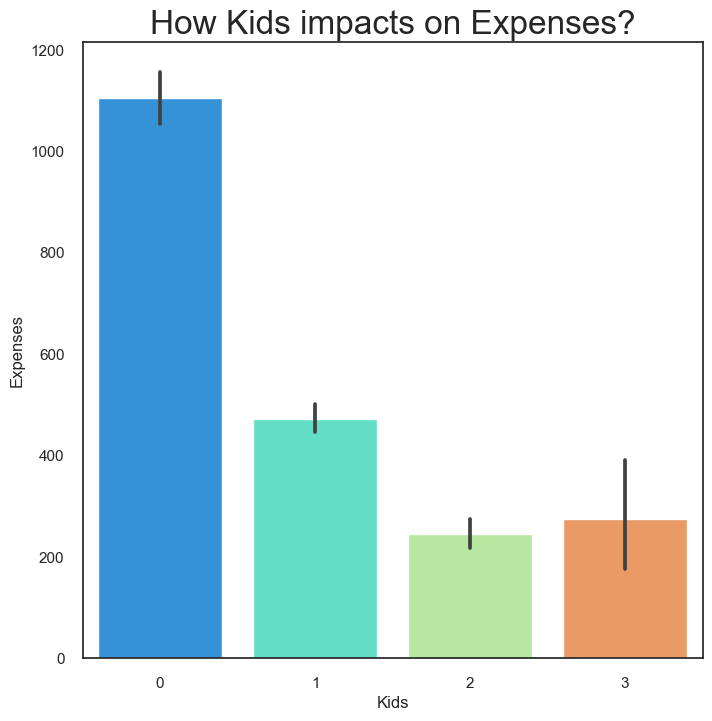

In [55]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow")

Here we observe some thing different that parents with 1 kid spends more than the parents who are having 2 or 3 kids

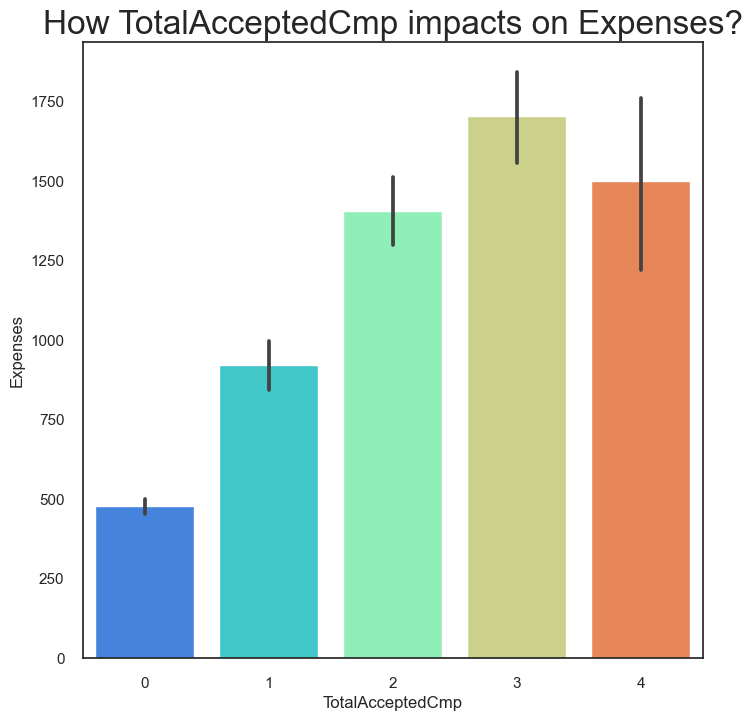

In [56]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="rainbow")

those who accepeted more campaign have more expenses

In [57]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_For'],
      dtype='object')

###### Remove some outliers present in age and income


In [58]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [59]:
df['Customer_For'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Customer_For, dtype: float64

In [60]:
df = df[df['Customer_Age'] < 90]
df = df[df['Income'] < 300000]

In [61]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age',
       'Customer_For'],
      dtype='object')

<Axes: >

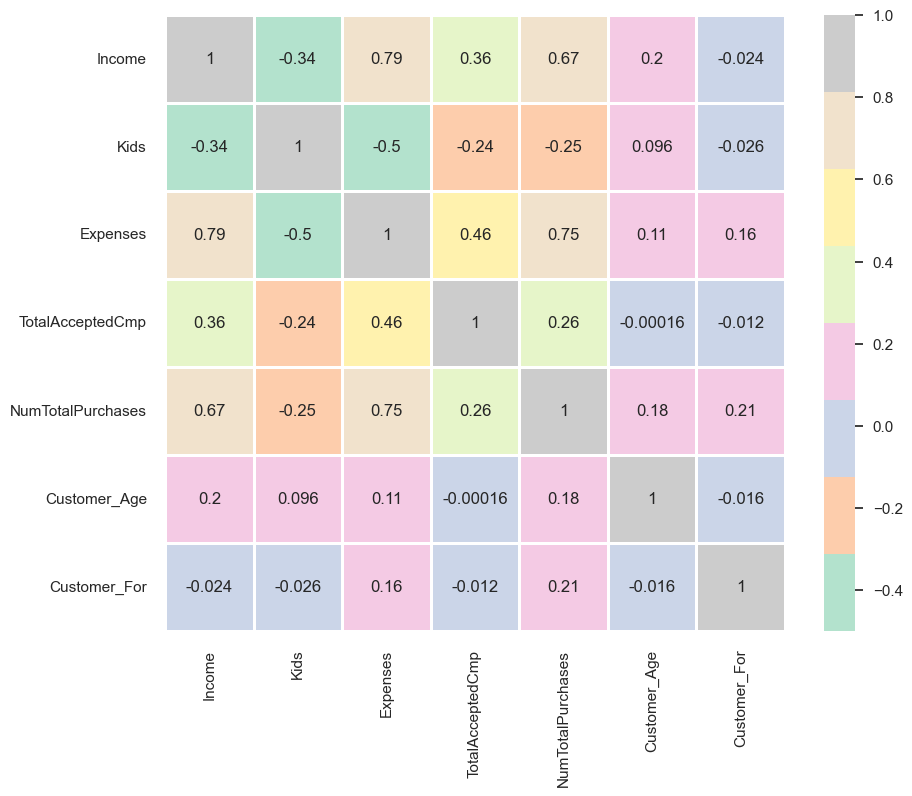

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'Pastel2',linewidths=1)

Income is more positively correlated to Expenses and Number of purchases

Expenses is positively correlated to Income and Number of pur chases and negitively correlated with Kids

In [63]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age', 'Customer_For']

df[col_scale] = scaler.fit_transform(df[col_scale])

In [65]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679


### Model Building

## K-Means

In [66]:
df = df.copy()

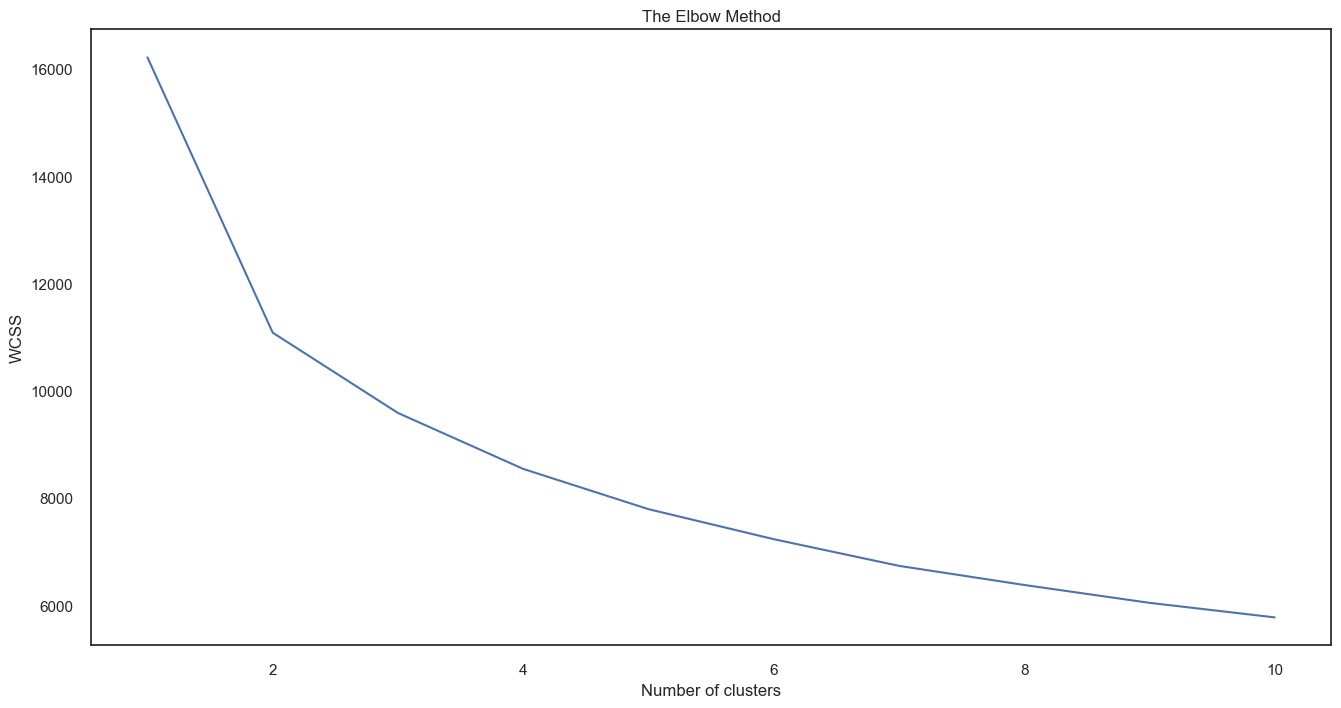

In [67]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=2, random_state=42).fit(df)
pred=kmeans.predict(df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster_Kmeans'] = pred + 1

In [69]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For,cluster_Kmeans
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793,2
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143,1
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659,2
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517,1
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679,1


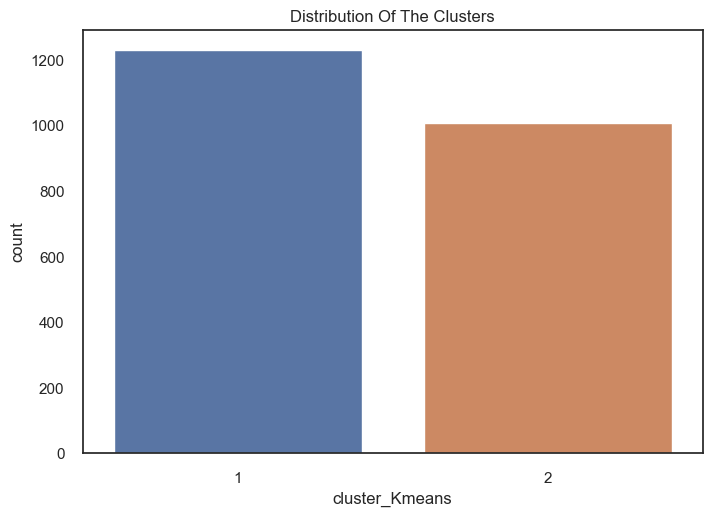

In [70]:
sns.countplot(x=df["cluster_Kmeans"])
plt.title("Distribution Of The Clusters")
plt.show()

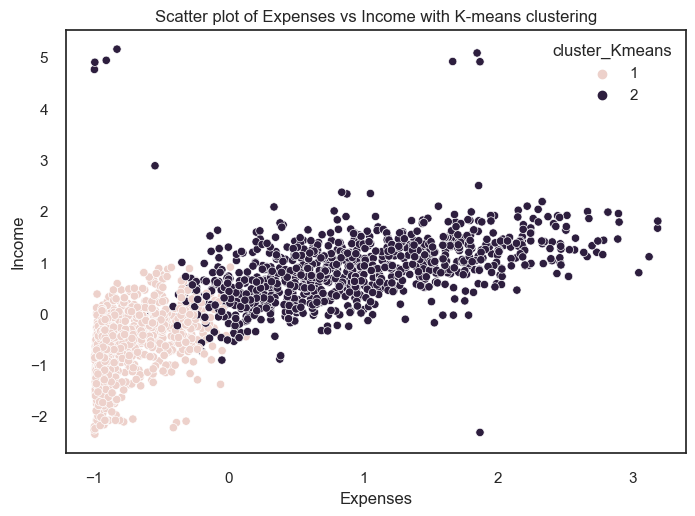

In [71]:
sns.scatterplot(x=df['Expenses'], y=df['Income'], hue=df['cluster_Kmeans'])
plt.xlabel('Expenses')
plt.ylabel('Income')
plt.title('Scatter plot of Expenses vs Income with K-means clustering')
plt.show()

###### pca with Agglomerative clustering

In [72]:
df1 = df.copy()

In [73]:
df1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age,Customer_For,cluster_Kmeans
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.319340,1.016868,1.529793,2
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.155857,1.273264,-1.191143,1
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.798246,0.333146,-0.206659,2
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.895310,-1.290693,-1.062517,1
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.537699,-1.034298,-0.953679,1


In [74]:
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df1)
PCA_ds = pd.DataFrame(pca.transform(df1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,5.719933e-17,1.782624,-2.802896,-1.673816,-0.359530,1.482424,5.631382
col2,2236.0,-3.654401e-17,1.063968,-2.908514,-0.788701,-0.008297,0.727024,3.685950
col3,2236.0,-1.747757e-17,1.027781,-2.227822,-0.850024,0.004662,0.819834,2.785667


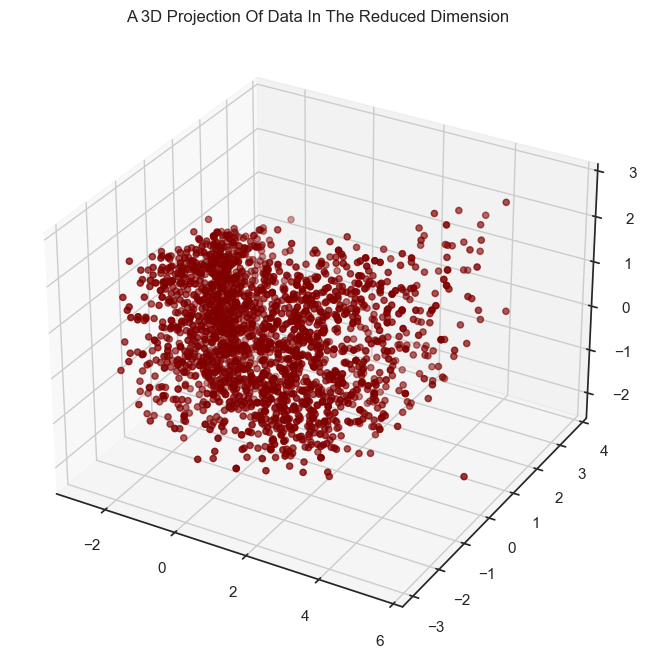

In [75]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

plt.show()

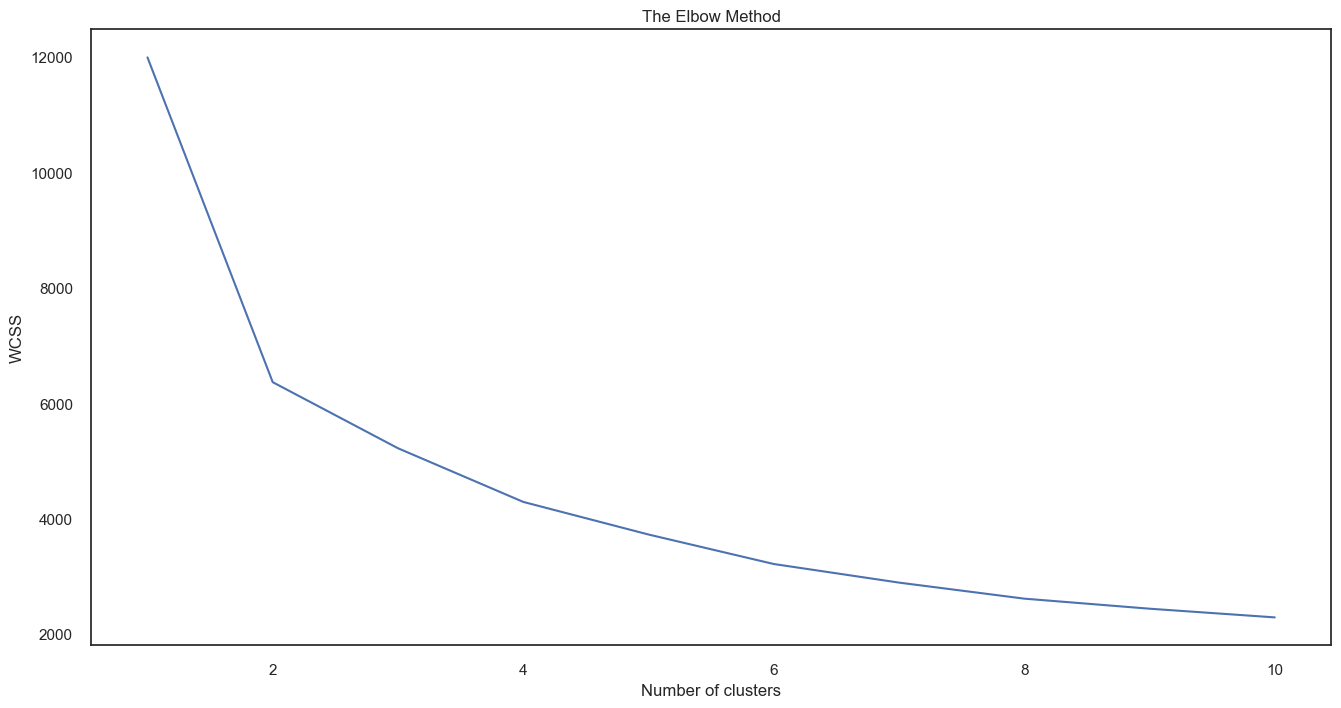

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WCSS is the sum of the squared distance between each point and the centroid in a cluster.

wcss values is more less for k=2 here...so we take k=2

In [77]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
df1["Cluster_Agglo"]= yhat_AC + 1

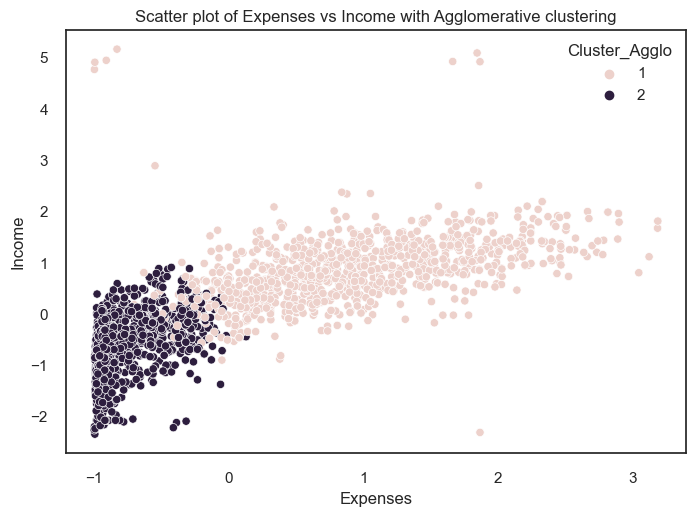

In [78]:
sns.scatterplot(data=df1, x='Expenses', y='Income', hue='Cluster_Agglo')
plt.xlabel('Expenses')
plt.ylabel('Income')
plt.title('Scatter plot of Expenses vs Income with Agglomerative clustering')
plt.show()

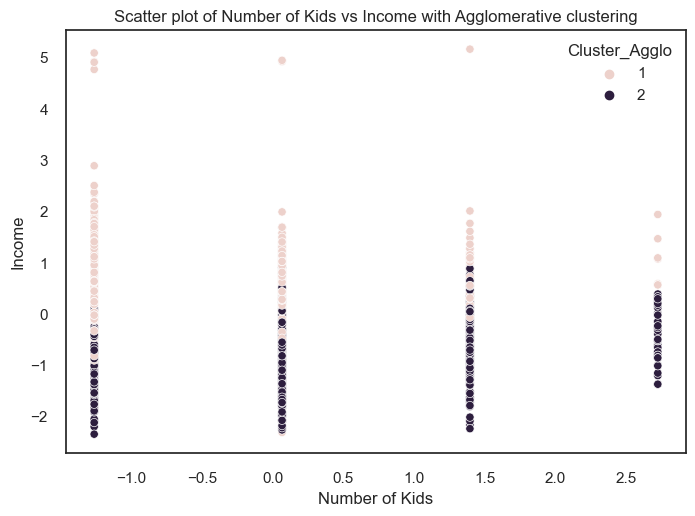

In [79]:
sns.scatterplot(data=df1, x='Kids', y='Income', hue='Cluster_Agglo')
plt.xlabel('Number of Kids')
plt.ylabel('Income')
plt.title('Scatter plot of Number of Kids vs Income with Agglomerative clustering')
plt.show()

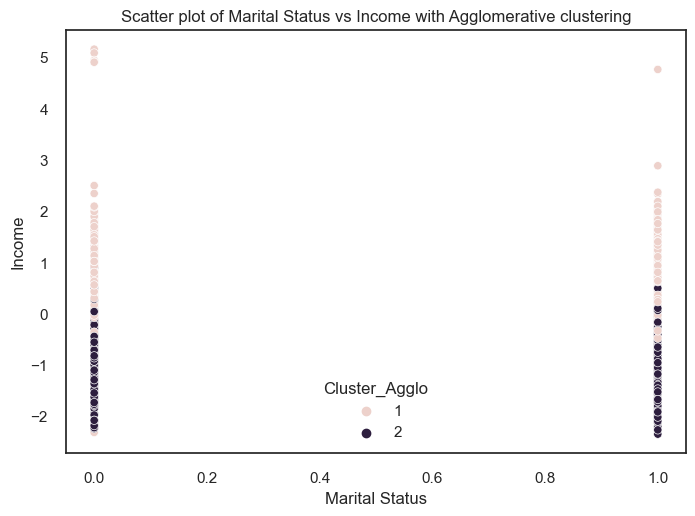

In [80]:
sns.scatterplot(data=df1, x='Marital_Status', y='Income', hue='Cluster_Agglo')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Scatter plot of Marital Status vs Income with Agglomerative clustering')
plt.show()

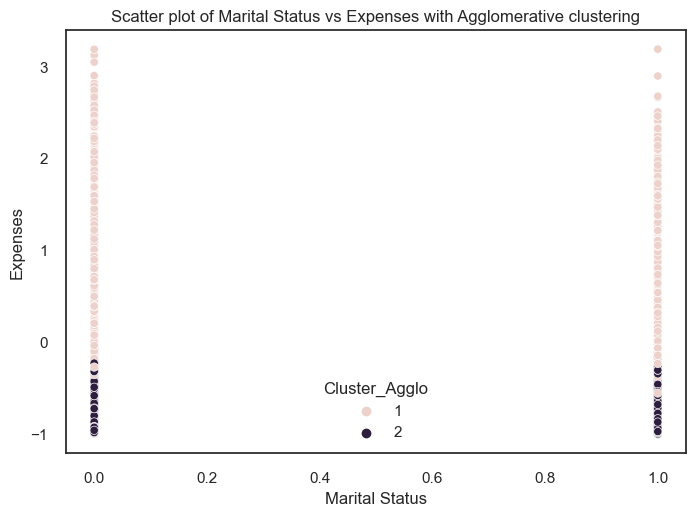

In [81]:
sns.scatterplot(data=df1, x='Marital_Status', y='Expenses', hue='Cluster_Agglo')
plt.xlabel('Marital Status')
plt.ylabel('Expenses')
plt.title('Scatter plot of Marital Status vs Expenses with Agglomerative clustering')
plt.show()

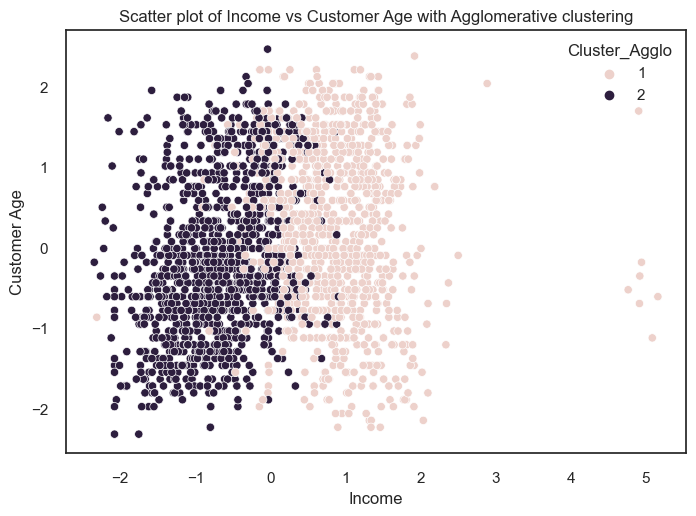

In [82]:
sns.scatterplot(data=df1, x='Income', y='Customer_Age', hue='Cluster_Agglo')
plt.xlabel('Income')
plt.ylabel('Customer Age')
plt.title('Scatter plot of Income vs Customer Age with Agglomerative clustering')
plt.show()

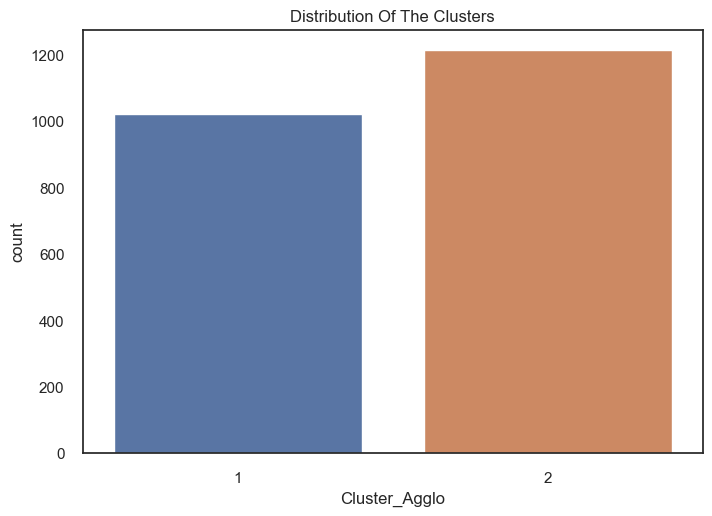

In [83]:
sns.countplot(x=df1["Cluster_Agglo"])
plt.title("Distribution Of The Clusters")
plt.show()

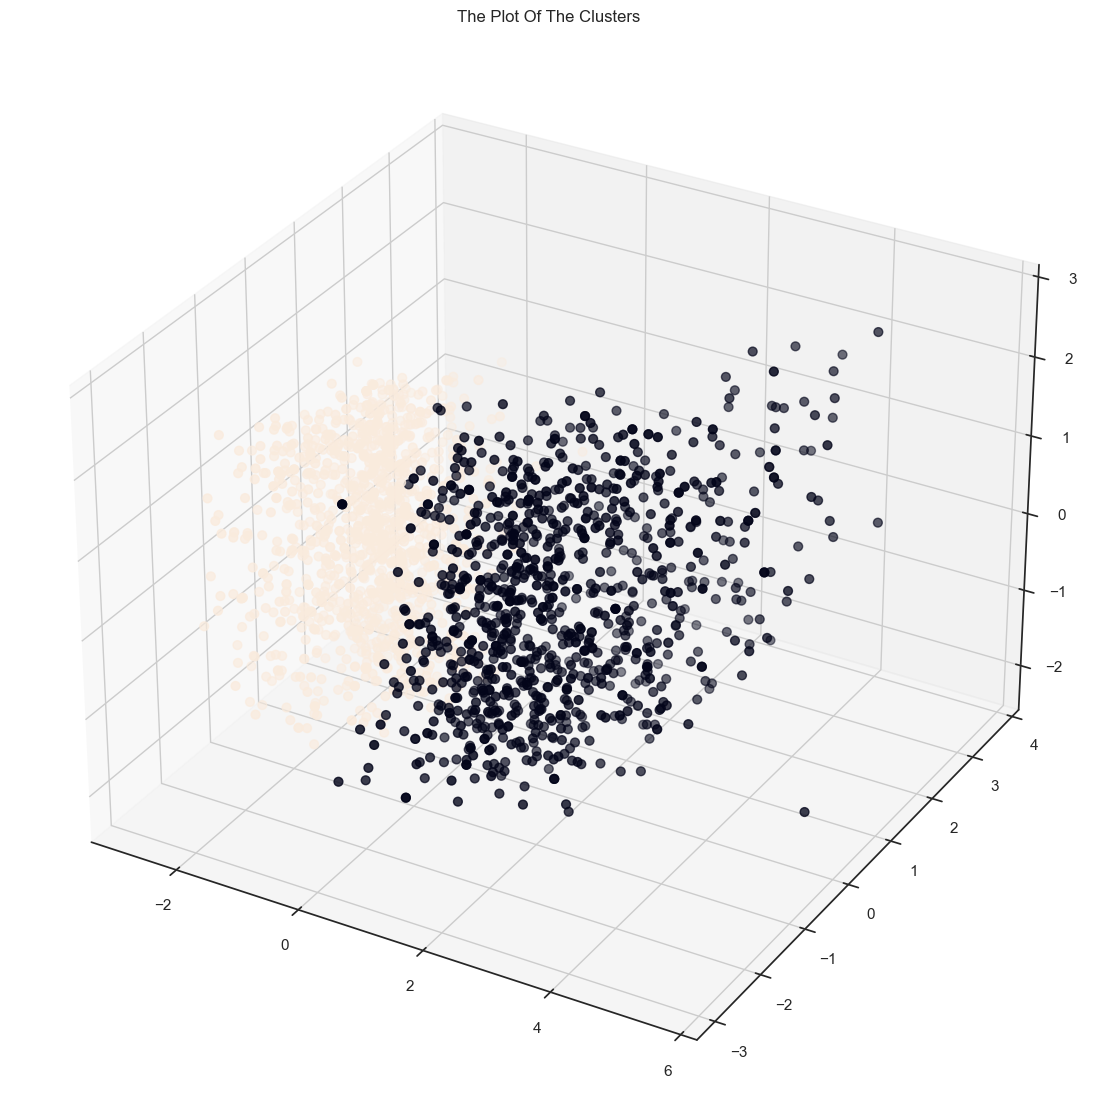

In [84]:
#Plotting the clusters
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, projection='3d', label=['g', 'r'])

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")

plt.show()

In [85]:
# Prepare data for classification (using all columns)
X = df.drop('cluster_Kmeans', axis=1)
y = df['cluster_Kmeans']

In [86]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Print the shape of the training data and testing data
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train:  (1788, 9)
Shape of X_test:  (448, 9)
Shape of y_train:  (1788,)
Shape of y_test: (448,)


## KNN - K-Nearest Neighbors classifier

In [88]:
# Initialize K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

In [92]:
# Fit KNN to the scaled training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
# Get the parameters of the trained KNN model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [95]:
# Predict labels using KNN on the scaled test data
y_pred = knn.predict(X_test)

### KNN Model Evaluation

Accuracy: 0.984375
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       252
           2       0.97      0.99      0.98       196

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



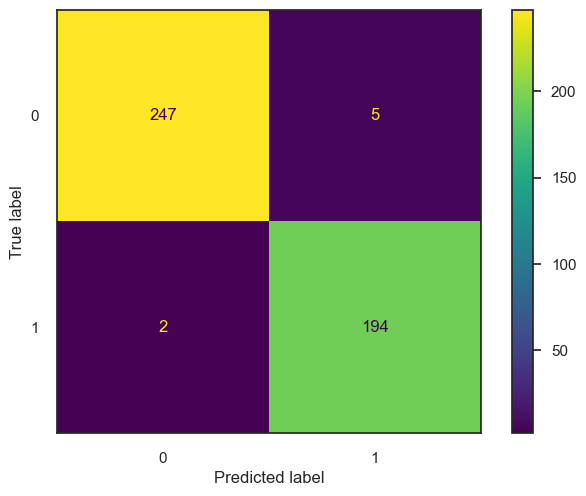

In [96]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Ensemble - Random Forest Classifier

In [97]:
# Initialize Random Forest Classifier
rfc_model = RandomForestClassifier()

In [98]:
# Fit the Random Forest model to the training data
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
# Predict labels using the trained Random Forest model on the test data
y_pred = rfc_model.predict(X_test)
y_pred

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,

#### Model Evaluation

Accuracy: 0.9799107142857143
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       252
           2       0.97      0.99      0.98       196

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



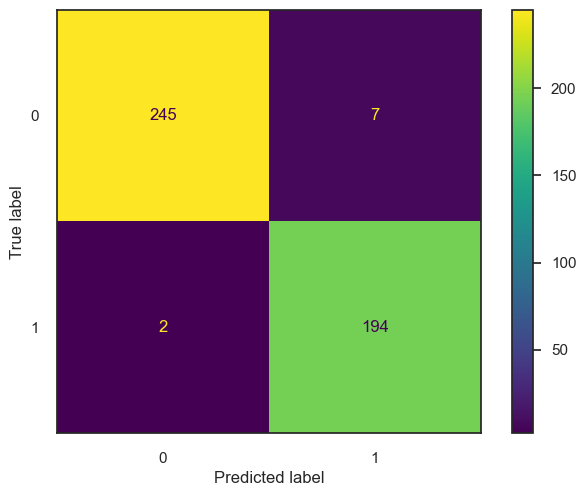

In [100]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [101]:
imp_feature = rfc_model.feature_importances_

# Get indices to sort feature importances in descending order
sorted_indices = np.argsort(imp_feature)[::-1]

# Sort feature importances and feature names accordingly
sorted_imp_feature = imp_feature[sorted_indices]
sorted_columns = X.columns[sorted_indices]

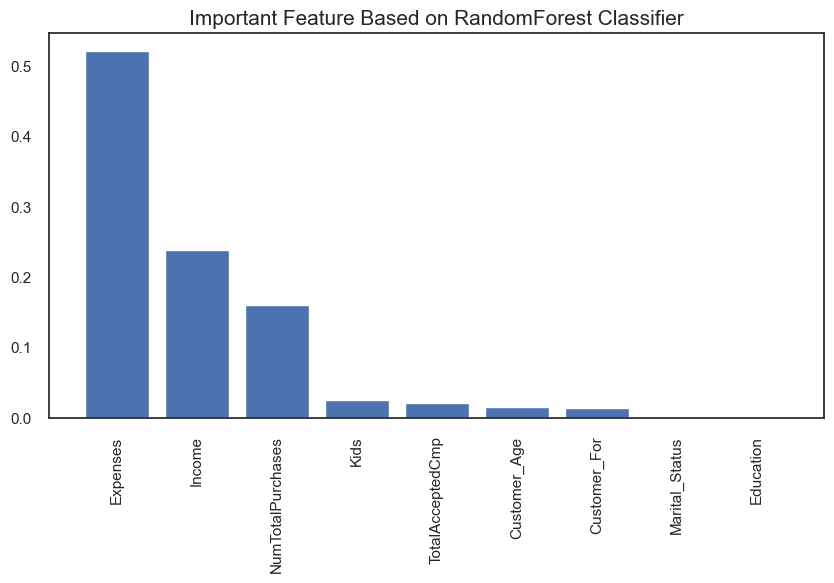

In [102]:
# Plot the sorted feature importances
plt.figure(figsize=(10,5))
plt.bar(x=sorted_columns, height=sorted_imp_feature)
plt.title('Important Feature Based on RandomForest Classifier', size=15)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Svc model

In [103]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [104]:
# Convert training and testing data to numpy arrays if they are not already
X_train_no_names = X_train.values if hasattr(X_train, 'values') else X_train
X_test_no_names = X_test.values if hasattr(X_test, 'values') else X_test

In [105]:
# Initialize and fit SVC model
svc_model = SVC()
svc_model.fit(X_train_no_names, y_train)

SVC()

In [106]:
# Predict the labels for the scaled test set using the best model
y_pred_svc = svc_model.predict(scaled_X_test)

Accuracy: 0.9776785714285714
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       252
           2       0.95      1.00      0.98       196

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



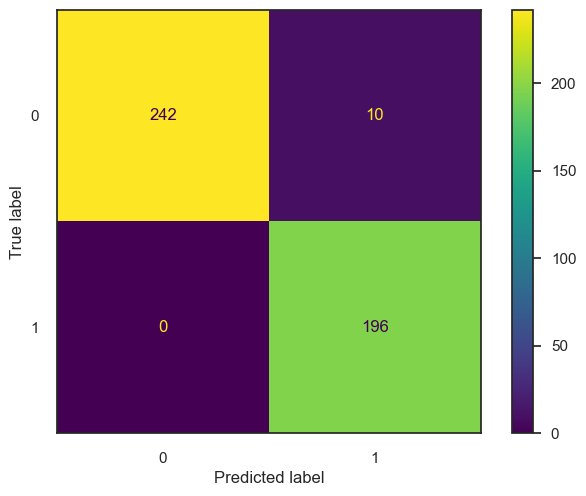

In [107]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc))
disp.plot()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

In [108]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[242  10]
 [  0 196]]


In [109]:
import pickle

In [110]:
pickle.dump(svc_model,open('svc_model.pkl','wb'))

In [111]:
import pandas as pd

# Assuming df is your DataFrame
# Convert DataFrame to Excel file
df.to_excel('output.xlsx', index=False)

<Axes: xlabel='cluster_Kmeans', ylabel='count'>

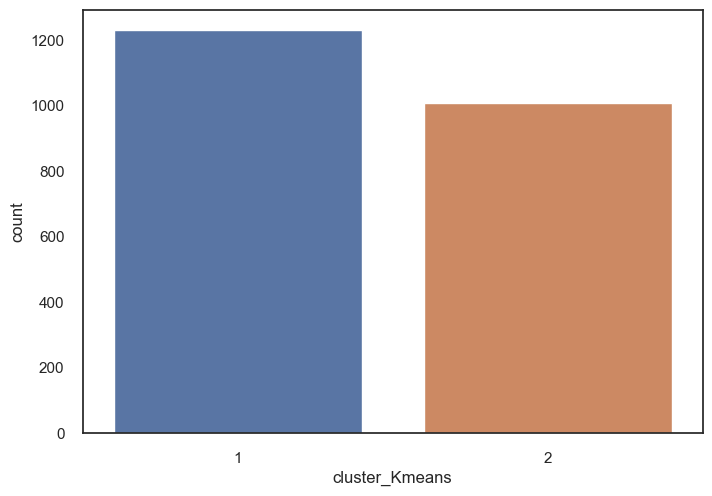

In [112]:
#Visualization
sns.countplot(x='cluster_Kmeans', data=df1)

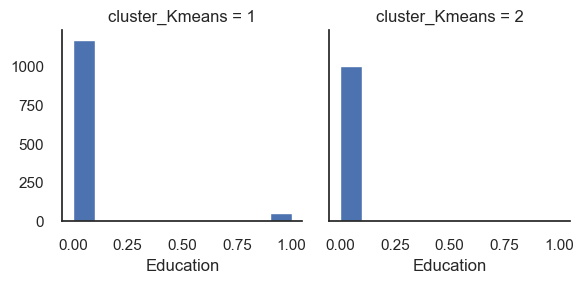

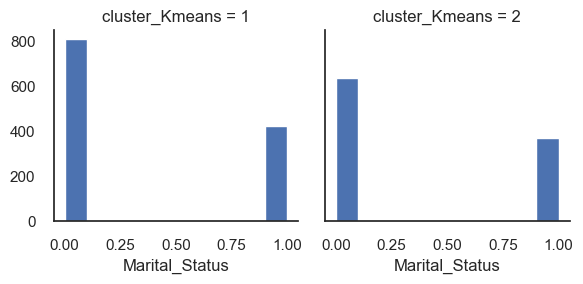

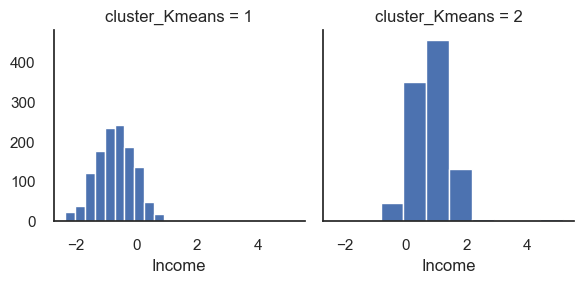

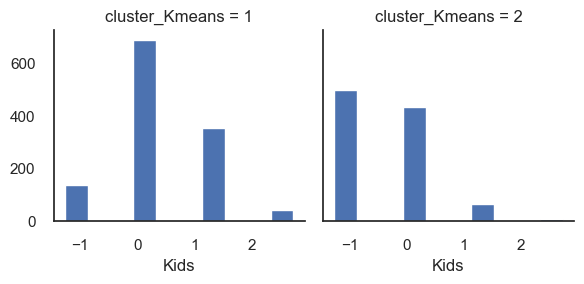

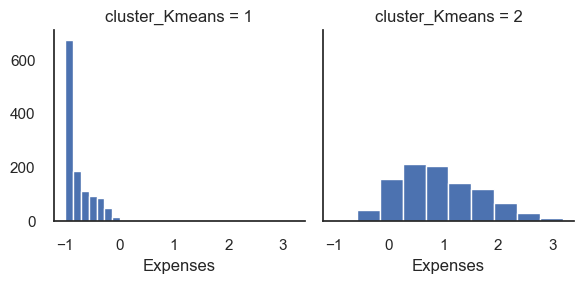

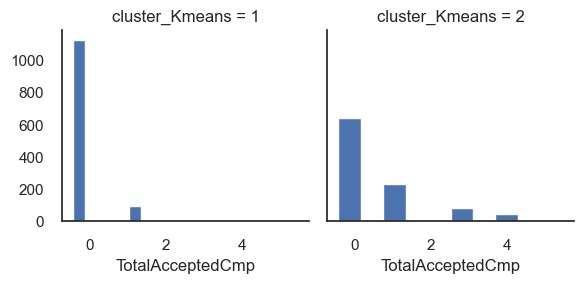

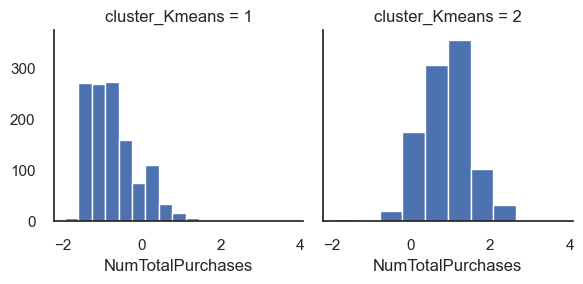

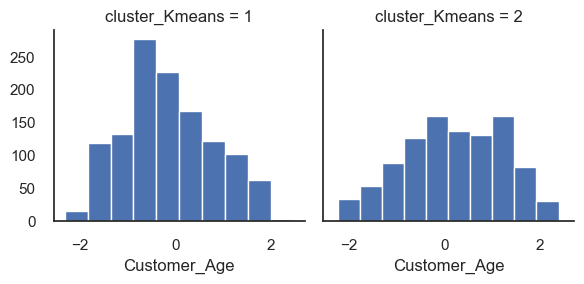

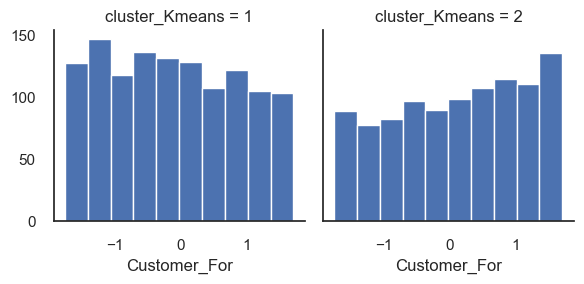

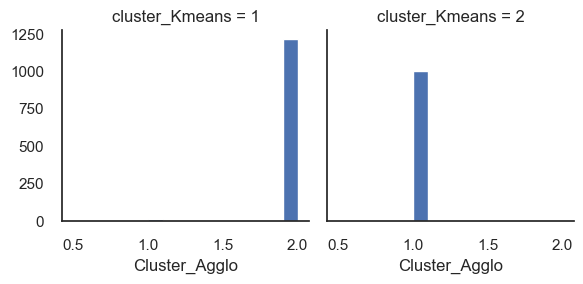

In [113]:
for c in df1.drop(['cluster_Kmeans'],axis=1):
    grid= sns.FacetGrid(df1, col='cluster_Kmeans')
    grid= grid.map(plt.hist, c)
plt.show()